#**Homework 2: RoboCup@Home Object Classification**

This homework aims at solving an image classification problem with objects typically available in a home environment. To this end, we will use the 
[RoboCup@Home-Objects dataset](https://sites.google.com/diag.uniroma1.it/robocupathome-objects/home) that has been developed within the [RoboCup@Home](https://athome.robocup.org) competition.

Each student will solve a personalized 8-classes classification problem (as a subset of the entire dataset), depending on his/her matricola code.

To generate your dataset, follow these steps:

1) Duplicate this Colab and put your matricola number in the piece of code below (replacing the ERROR string)

2) Run the code and take note of the 8 printed labels 

3) Download the corresponding 8 ZIP files from this folder

https://drive.google.com/drive/folders/1dL4OZRPLahq6aSgWxk9efmFbfoy1Vp0I

4) Use images in these 8 ZIP files as dataset for your 8-classes image classification problem

In [ ]:
labels = {
  'containers': [ 'food_tray', 'glass_container', 'serving_tray', 'disposable_container', 'plastic_tray', 'grocery_bag', 'decorative_tray', 'reusable_bag', 'plastic_bag', 'paper_bag', 'food_banister', 'basket_container', 'glass_tray', 'colored_paper_bag', 'plastic_food_container', 'glass_food_container', 'plastic_container',  ],
  'tableware': [ 'pasta_bowl', 'teacup', 'snack_bowl', 'espresso_cup', 'accent_plate', 'beer_glasses', 'cereal_bowl', 'water_glasses', 'dessert_plate', 'soup_bowl', 'side_dish_plate', 'rice_bowl', 'salad_plate', 'salad_bowl', 'buillin_cup', 'fruit_plate', 'saucer_cup', 'coffee_mug', 'dessert_bowl', 'coffee_cup', 'dinner_plate', 'sushi_plate', 'wine_glasses',  ],
  'drinks': [ 'Cocoa_drink_bottle', 'juice_carton', 'Coffee_drink_bottle', 'Flavored_Water', 'Tonic_Water', 'Tea_drink_bottle', 'Sparkling_Water', 'Juice_bottle', 'Seltzer_Water', 'Mineral_Water', 'Sports_Drinking_Water', 'juice_box', 'Soft_Drink_can', 'iced_tea', 'Energy_Drink', 'chocolate_drink_bottle', 'soft_drink_bottle',  ],
  'cutlery': [ 'Knives', 'chopsticks', 'plastic_fork', 'carving_knife_fork', 'Forks', 'utensils', 'cake_server', 'butter_knives', 'plastic_spoon', 'dinnerware', 'plastic_knife', 'Sporks', 'steak_knives', 'Spoons', 'serveware',  ],
  'fruits': [ 'Bananas', 'Oranges', 'Cranberries', 'Nectarines', 'Plums', 'Grapes', 'Grapefruit', 'Papayas', 'Peaches', 'Raspberries', 'Strawberries', 'Pears', 'Pineapple', 'Lemons', 'Blueberries', 'Tangerines', 'Mangos', 'Figs', 'Cherries', 'Melons', 'Apricots', 'Mixed', 'Apples',  ],
  'snacks': [ 'Mints_bag', 'Fruit_Snacks', 'Vegetable_Chips_&_Crisps', 'Marshmallows_bag', 'bubble_gum_brand', 'Cookies', 'Sour_Candy_bag', 'Hard_Candy_snacks', 'potato_Crisps', 'Candy_Bars', 'snacks_Seeds', 'Pretzels', 'Chewing_Gum_brand', 'Jelly_Beans_bag', 'potato_chips_pringles', 'Assorted_Snack_Cookies', 'Lollipops', 'Breadsticks', 'Gummy_Candy_bag', 'Potato_Chips_bag', 'Fruit_Cups', 'Puffed_Snacks', 'Nuts_snacks', 'Crackers', 'Party_Mix_snack', 'Popcorn',  ],
  'food': [ 'Olives_jar', 'pasta_sides', 'rice_sides', 'jarred_vegetables', 'Muesli_box', 'instant_ramen_noodles', 'canned_sardines', 'pickled_vegetables', 'Packaged_Bread', 'Oatmeal_box', 'noodle_soup_cup', 'Fruit_Butters', 'canned_tuna', 'Jams', 'Nut_&_Seed_Butter', 'Honey', 'canned_vegetables', 'Marmalades', 'Cereals_box', 'canned_soup', 'instant_Soup', 'Macaroni_&_Cheese_box',  ],
  'cleaning_stuff': [ 'Paper_Towels', 'Floor_Cleaners', 'Carpet_Cleaners', 'Sponges', 'Glass_Cleaners', 'Furniture_&_Wood_Polishes', 'Metal_Polishes', 'Broom_Handles_&_Heads', 'Latex_Gloves', 'Hand_Brooms', 'Push_Brooms', 'Caddies', 'All-Purpose_Cleaners', 'Wet_Mops', 'Brushes', 'Cloths_&_Wipes', 'Mop_Handles', 'Bathroom_Cleaners', 'Carpet_Spot_Cleaning_Sprays', 'Angle_Brooms', 'Mop_Heads_&_Sponges', 'Dust_Cloths', 'Drain_Openers', 'Dust_Mops_&_Pads', 'Carpet_Stain_Precleaners', 'Carpet_Machine_Detergents', 'Carpet_Deodorizers', 'Vinyl_Gloves', 'Upholstery_Cleaners', 'Refill_Sponges', 'Feather_Dusters', 'Squeegees', 'Buckets', 'Nitrile_Gloves', 'Dustpans', 'Replacement_Heads', 'Kitchen_Cleaners',  ]
}


import random

# Put your matricola number here (replacing ERROR)
matricola = 1938388

random.seed(matricola)

for k in labels.keys():
  #print(labels[k])
  tl = random.choice(list(labels[k]))
  print("%s/%s" %(k,tl))


containers/plastic_tray
tableware/dinner_plate
drinks/Energy_Drink
cutlery/Forks
fruits/Lemons
snacks/Lollipops
food/pickled_vegetables
cleaning_stuff/Wet_Mops


# **Import libraries**

In [1]:
import numpy as np
import tensorflow as tf
import os
import pickle 
from google.colab import drive
import sklearn.metrics 
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential, Model, load_model
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras import regularizers, optimizers
from keras.layers import Input, Dense, Activation, Dropout, Flatten,\
                         Conv2D, MaxPooling2D, AveragePooling2D, GlobalAveragePooling2D,\
                         UpSampling2D, MaxPool2D

print("Tensorflow version %s" %tf.__version__)
print("Keras version %s" %keras.__version__)

device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Tensorflow version 2.4.0
Keras version 2.4.3
Found GPU at: /device:GPU:0


# **Definition of some usful functions**

In [2]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, Ypred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    else:
        pass
        
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    ax.set_ylim(len(classes)-0.5, -0.5)

    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

dir = '/content/drive/MyDrive/Colab Notebooks/homework2/'
models_dir = dir + 'models/'
his_dir = dir + 'models/'
img_dir = dir + 'images/'

def savemodel(model,problem):
    filename = os.path.join(models_dir, '%s.h5' %problem)
    model.save(filename)
    print("\nModel saved successfully on file %s\n" %filename)

def savehistory(history,problem):
    filename = os.path.join(his_dir, '%s.hist' %problem)
    with open(filename, 'wb') as f:
        pickle.dump(history.history, f, pickle.HIGHEST_PROTOCOL)
    print("\nHystory saved on file %s\n" %filename)

def loadmodel(problem):
    filename = os.path.join(models_dir, '%s.h5' %problem)
    try:
        model = load_model(filename)
        print("\nModel loaded successfully from file %s\n" %filename)
    except OSError:    
        print("\nModel file %s not found!!!\n" %filename)
        model = None
    return model

def loadhistory(problem):
    filename = os.path.join(his_dir, '%s.hist' %problem)
    try:
        with open(filename, 'rb') as h:
          history = pickle.load(h)
          print("\nModel loaded successfully from file %s\n" %filename)
    except OSError:    
        print("\nModel file %s not found!!!\n" %filename)
        history = None
    return history

# **Load and split data**

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
train_datagen = ImageDataGenerator(
    rescale = 1. / 255,\
    zoom_range=0.1,\
    rotation_range=10,\
    width_shift_range=0.1,\
    height_shift_range=0.1,\
    horizontal_flip=True,\
    vertical_flip=False,
    validation_split = 0.2)

train_generator = train_datagen.flow_from_directory(
    directory=img_dir,
    target_size=(256, 256),
    color_mode="rgb",  
    class_mode="categorical",
    shuffle=True,
    subset ='training'
    )

validation_generator = train_datagen.flow_from_directory(
    directory=img_dir, 
    target_size=(256, 256),
    shuffle=False,
    class_mode='categorical',
    subset='validation') 

num_samples = train_generator.n
num_classes = train_generator.num_classes
input_shape = train_generator.image_shape

classnames = [k for k,v in train_generator.class_indices.items()]

print("Image input     : %s" %str(input_shape))
print("N° of classes   : %d" %(num_classes))
print("Name of classes : %r" %(classnames))

print('TRAINING SAMPLES: %d.' %(num_samples))
print('TEST SAMPLES    : %d.' %(validation_generator.n))


Found 7338 images belonging to 8 classes.
Found 1830 images belonging to 8 classes.
Image input     : (256, 256, 3)
N° of classes   : 8
Name of classes : ['Energy_Drink', 'Forks', 'Lemons', 'Lollipops', 'Wet_Mops', 'dinner_plate', 'pickled_vegetables', 'plastic_tray']
TRAINING SAMPLES: 7338.
TEST SAMPLES    : 1830.


# **Generate 5 random images from the dataset**

pickled_vegetables


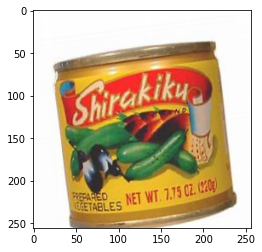

Forks


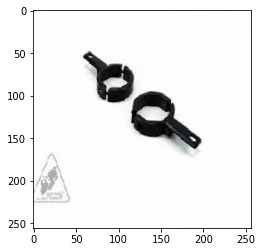

Lollipops


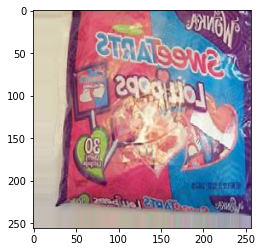

Forks


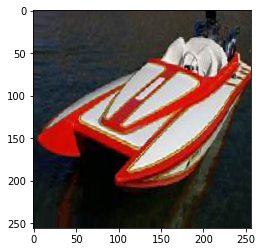

Forks


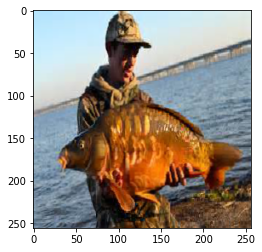

In [5]:
n = 5
x,y = train_generator.next()

for i in range(0,n):
    image = x[i]
    label = y[i].argmax()  
    print(classnames[label])
    plt.imshow(image)
    plt.show()

# **Models**

## LeNet model with tanh as activation function

In [6]:
# LeNet with tanh as activation function 
def LeNetAdam(input_shape, num_classes):
  
    model = Sequential()
    
    # First Convolutional Layer 
    model.add(Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='tanh', input_shape=input_shape, padding='same'))
    
    # Second layer: Pooling
    model.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))
    
    # Third Convolutional Layer 
    model.add(Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'))
    
    # Forth layer: Pooling
    model.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))

    # Fifth Convolutional Layer
    model.add(Conv2D(120, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'))

    # Flatten 
    model.add(Flatten())
    
    # Sixth Dense layer
    model.add(Dense(84, activation='tanh'))
    
    # Seventh Dense layer
    model.add(Dense(num_classes, activation='softmax'))

    # Compile
    model.compile(loss=keras.losses.categorical_crossentropy, optimizer='adam', metrics=['accuracy'])
    return model
 
# create the model
model = LeNetAdam(input_shape,num_classes)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 6)       456       
_________________________________________________________________
average_pooling2d (AveragePo (None, 128, 128, 6)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 124, 124, 16)      2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 62, 62, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 58, 58, 120)       48120     
_________________________________________________________________
flatten (Flatten)            (None, 403680)            0         
_________________________________________________________________
dense (Dense)                (None, 84)                3

## LeNet model with ReLU as activation function

In [7]:
# LeNet with ReLU as activation function
def LeNetReLU(input_shape, num_classes):
    
    model = Sequential()
    
    # First Convolutional Layer 
    model.add(Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='relu', input_shape=input_shape, padding='same'))
    
    # Second layer: Pooling
    model.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))
    
    # Third Convolutional Layer
    model.add(Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='relu', padding='valid'))
    
    # Forth layer: Pooling
    model.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))
    
    # Fifth Convolutional Layer
    model.add(Conv2D(120, kernel_size=(5, 5), strides=(1, 1), activation='relu', padding='valid'))
    
    # Flatten
    model.add(Flatten())

    # Sixth Dense layer
    model.add(Dense(84, activation='relu'))

    # Seventh Dense layer
    model.add(Dense(num_classes, activation='softmax'))

    # Compile
    model.compile(loss=keras.losses.categorical_crossentropy, optimizer='adam', metrics=['accuracy'])
    
    return model
 
# create the model
model = LeNetReLU(input_shape,num_classes)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 256, 256, 6)       456       
_________________________________________________________________
average_pooling2d_2 (Average (None, 128, 128, 6)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 124, 124, 16)      2416      
_________________________________________________________________
average_pooling2d_3 (Average (None, 62, 62, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 58, 58, 120)       48120     
_________________________________________________________________
flatten_1 (Flatten)          (None, 403680)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 84)               

## AlexNet model

In [8]:
# AlexNet model
def AlexNet(input_shape, num_classes, regl2 = 0.0001, lr=0.0001):

    model = Sequential()

    # First Convolutional Layer 
    model.add(Conv2D(filters=96, input_shape=input_shape, kernel_size=(11,11),\
                     strides=(2,4), padding='valid'))
    model.add(Activation('relu'))
    # Pooling
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
    # Batch Normalisation
    model.add(BatchNormalization())

    # Second Convolutional Layer
    model.add(Conv2D(filters=256, kernel_size=(11,11), strides=(1,1), padding='valid'))
    model.add(Activation('relu'))
    # Pooling
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
    # Batch Normalisation
    model.add(BatchNormalization())

    # Third Convolutional Layer
    model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
    model.add(Activation('relu'))
    # Batch Normalisation
    model.add(BatchNormalization())

    # Forth Convolutional Layer
    model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
    model.add(Activation('relu'))
    # Batch Normalisation
    model.add(BatchNormalization())

    # Fifth Convolutional Layer
    model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid'))
    model.add(Activation('relu'))
    # Pooling
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
    # Batch Normalisation
    model.add(BatchNormalization())

    # Flatten to pass to fully connected layer
    model.add(Flatten())
    flatten_shape = (input_shape[0]*input_shape[1]*input_shape[2],)
    
    # First Dense Layer
    model.add(Dense(4096, input_shape=flatten_shape, kernel_regularizer=regularizers.l2(regl2)))
    model.add(Activation('relu'))
    # Dropout
    model.add(Dropout(0.4))
    # Batch Normalisation
    model.add(BatchNormalization())

    # Second Dense Layer
    model.add(Dense(4096, kernel_regularizer=regularizers.l2(regl2)))
    model.add(Activation('relu'))
    # Dropout
    model.add(Dropout(0.4))
    # Batch Normalisation
    model.add(BatchNormalization())

    # Third Dense Layer
    model.add(Dense(1000,kernel_regularizer=regularizers.l2(regl2)))
    model.add(Activation('relu'))
    # Dropout
    model.add(Dropout(0.4))
    # Batch Normalisation
    model.add(BatchNormalization())

    # Output Layer
    model.add(Dense(num_classes))
    model.add(Activation('softmax'))

    # I choose to use adam optimizer
    adam = optimizers.Adam(lr=lr)
    
    # Compile
    model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

    return model
 
# create the model
model = AlexNet(input_shape,num_classes)
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 123, 62, 96)       34944     
_________________________________________________________________
activation (Activation)      (None, 123, 62, 96)       0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 61, 31, 96)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 61, 31, 96)        384       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 51, 21, 256)       2973952   
_________________________________________________________________
activation_1 (Activation)    (None, 51, 21, 256)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 10, 256)      

## TransferNet model

In [10]:
# TrasnferNet model

# Load VGG16 pre-trained model 

def load_vgg16_features(input_shape, init_weights=None):
    input0 = Input(shape=input_shape)
    vgg16_model = keras.applications.vgg16.VGG16(include_top=False, weights=init_weights, input_tensor=input0)
    feature_extractor = keras.models.Model(inputs=input0, outputs=vgg16_model.output, name="vgg16_features")
    optimizer = 'adam'
    feature_extractor.compile(loss=keras.losses.categorical_crossentropy, optimizer=optimizer, metrics=['accuracy'])
    return feature_extractor

def transferNet(input_shape, num_classes, output_layer_name, trainable_layers):
    feature_extractor = load_vgg16_features(input_shape, init_weights='imagenet')
    input_t = feature_extractor.get_layer(index=0).input

    for idx,layer in enumerate(feature_extractor.layers):
      if layer.name in trainable_layers:
        layer.trainable = True
      else:
        layer.trainable = False

    output_extractor = feature_extractor.get_layer(name = output_layer_name).output

    # flat the output of a Convolutional layer
    flatten = Flatten()(output_extractor) 
    flatten_norm = BatchNormalization()(flatten)

    # Dense layer 1
    dense1 = Dropout(0.4)(flatten_norm)
    dense1 = Dense(200, activation='relu')(dense1)
    dense1 = BatchNormalization()(dense1)
    
    # Dense layer 2
    dense2 = Dropout(0.4)(dense1)
    dense2 = Dense(100, activation='relu')(dense2)
    dense2 = BatchNormalization()(dense2)

    # Output layer
    dense3 = BatchNormalization()(dense2)
    dense3 = Dense(num_classes, activation='softmax')(dense3)
    
    model = keras.models.Model(inputs=input_t, outputs=dense3, name="transferNet")
    
    optimizer = 'adam'
    model.compile(loss=keras.losses.categorical_crossentropy, optimizer=optimizer, metrics=['accuracy'])

    return model

name_output_extractor = "block5_pool"
trainable_layers = ["block5_conv3"]

model = transferNet(input_shape, num_classes, name_output_extractor, trainable_layers)
model.summary()

58892288/58889256 [==============================] - 0s 0us/step
Model: "transferNet"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
________________________________________________________

## DeniNet model

In [11]:
def DeniNet(input_shape, num_classes):

    model = Sequential(name="DeniNet")

    # C1 Convolutional Layer 
    model.add(Conv2D(filters=15, input_shape=input_shape, kernel_size=(4,4)))
    model.add(Activation('relu'))

    # C2 Convolutional Layer
    model.add(Conv2D(filters=20, kernel_size=(4,4)))
    model.add(Activation('relu'))
    # Pooling
    model.add(MaxPooling2D(pool_size=(2,2)))

    # C3 Convolutional Layer
    model.add(Conv2D(filters=30, kernel_size=(5,5)))
    model.add(Activation('relu'))
    # Pooling
    model.add(MaxPooling2D(pool_size=(2,2)))

    # C4 Convolutional Layer
    model.add(Conv2D(filters=30, kernel_size=(4,4)))
    model.add(Activation('relu'))
    # Pooling
    model.add(MaxPooling2D(pool_size=(2,2)))

    # C5 Convolutional Layer
    model.add(Conv2D(filters=30, kernel_size=(3,3)))
    model.add(Activation('relu')) 
    # Pooling
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    # C6 Convolutional Layer
    model.add(Conv2D(filters=30, kernel_size=(4,4)))
    model.add(Activation('relu'))
    # Pooling
    model.add(MaxPooling2D(pool_size=(2,2)))

    # Flatten
    model.add(Flatten())

    # D1 Dense Layer
    model.add(Dense(128))
    model.add(Activation('relu'))
    # Dropout
    model.add(Dropout(0.4))
    # D2 Dense Layer
    model.add(Dense(96))
    model.add(Activation('relu'))
    # Dropout
    model.add(Dropout(0.4))

    # Output Layer
    model.add(Dense(num_classes))
    model.add(Activation('softmax'))

    # Compile
    optimizer = 'rmsprop'
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    return model
 
# create the model
model = DeniNet(input_shape,num_classes)
model.summary()

Model: "DeniNet"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 253, 253, 15)      735       
_________________________________________________________________
activation_9 (Activation)    (None, 253, 253, 15)      0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 250, 250, 20)      4820      
_________________________________________________________________
activation_10 (Activation)   (None, 250, 250, 20)      0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 125, 125, 20)      0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 121, 121, 30)      15030     
_________________________________________________________________
activation_11 (Activation)   (None, 121, 121, 30)      0   

# **Train model**

In [ ]:
steps_per_epoch=train_generator.n//train_generator.batch_size
val_steps=train_generator.n//train_generator.batch_size+1
epochs = 10
try:
    history = model.fit(train_generator, epochs=epochs, verbose=1,\
                    steps_per_epoch=steps_per_epoch,\
                    validation_data=train_generator,\
                    validation_steps=val_steps)
except KeyboardInterrupt:
    pass

# **Evaluate model**

### Classification report

In [14]:
preds = model.predict(validation_generator ,verbose=1)
Ypred = np.argmax(preds, axis=1)
Ytest = validation_generator.classes

print(classification_report(Ytest, Ypred, labels=None, target_names=classnames, digits=3))

58/58 [==============================] - 799s 14s/step
                    precision    recall  f1-score   support

      Energy_Drink      0.912     0.967     0.939       246
             Forks      0.928     0.905     0.917       243
            Lemons      0.876     0.910     0.893       210
         Lollipops      0.909     0.921     0.915       228
          Wet_Mops      0.903     0.922     0.912       231
      dinner_plate      0.930     0.892     0.911       223
pickled_vegetables      0.903     0.845     0.873       232
      plastic_tray      0.917     0.912     0.915       217

          accuracy                          0.910      1830
         macro avg      0.910     0.909     0.909      1830
      weighted avg      0.910     0.910     0.910      1830



### Confusion matrix

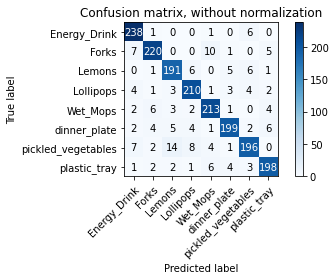

In [15]:
plot_confusion_matrix(Ytest, Ypred, classes=classnames, normalize=False)

In [16]:
cm = confusion_matrix(Ytest, Ypred)

conf = [] 
for i in range(0,cm.shape[0]):
  for j in range(0,cm.shape[1]):
    if (i!=j and cm[i][j]>0):
      conf.append([i,j,cm[i][j]])

col=2
conf = np.array(conf)
conf = conf[np.argsort(-conf[:,col])] 

print('%-16s     %-16s  \t%s \t%s ' %('True','Predicted','errors','err %'))
print('------------------------------------------------------------------')
for k in conf:
  print('%-16s ->  %-16s  \t%d \t%.2f %% ' %(classnames[k[0]],classnames[k[1]],k[2],k[2]*100.0/validation_generator.n))
  

True                 Predicted         	errors 	err % 
------------------------------------------------------------------
pickled_vegetables ->  Lemons            	14 	0.77 % 
Forks            ->  Wet_Mops          	10 	0.55 % 
pickled_vegetables ->  Lollipops         	8 	0.44 % 
Forks            ->  Energy_Drink      	7 	0.38 % 
pickled_vegetables ->  Energy_Drink      	7 	0.38 % 
Lemons           ->  pickled_vegetables  	6 	0.33 % 
dinner_plate     ->  plastic_tray      	6 	0.33 % 
Lemons           ->  Lollipops         	6 	0.33 % 
Wet_Mops         ->  Forks             	6 	0.33 % 
Energy_Drink     ->  pickled_vegetables  	6 	0.33 % 
plastic_tray     ->  Wet_Mops          	6 	0.33 % 
Lemons           ->  dinner_plate      	5 	0.27 % 
Forks            ->  plastic_tray      	5 	0.27 % 
dinner_plate     ->  Lemons            	5 	0.27 % 
pickled_vegetables ->  Wet_Mops          	4 	0.22 % 
Lollipops        ->  Energy_Drink      	4 	0.22 % 
dinner_plate     ->  Forks             	4 	0.22 

### Plot for accuracy and loss function

Plot for trained model


In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Plot for loaded model

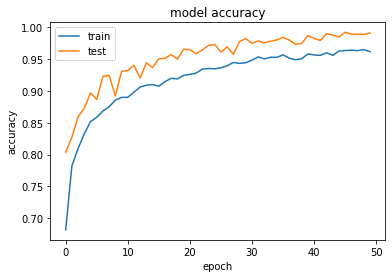

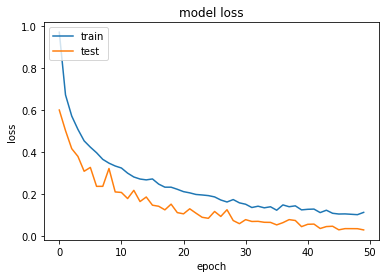

In [17]:
# summarize history for accuracy
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# **Load and save**

In [ ]:
# Save the model
model_name = input("Insert model name: ")
savemodel(model,model_name)
savehistory(history,model_name)

Insert model name: DeniNet50

Model saved successfully on file /content/drive/MyDrive/Colab Notebooks/homework2/models/DeniNet50.h5


Hystory saved on file /content/drive/MyDrive/Colab Notebooks/homework2/models/DeniNet50.hist



In [12]:
# Load the model
model_name = input("Insert model name: ")
model = loadmodel(model_name)

Insert model name: TransferNet50

Model loaded successfully from file /content/drive/MyDrive/Colab Notebooks/homework2/models/TransferNet50.h5



In [13]:
# Load the history
model_name = input("Insert model name: ")
history = loadhistory(model_name)

Insert model name: TransferNet50

Model loaded successfully from file /content/drive/MyDrive/Colab Notebooks/homework2/models/TransferNet50.hist

